# R Coding Basics
Prior jumping into PCAs, lets first explore some fundamentals in R....

Coding Basics
head
few
cat

### Understanding R Code
R is similar to python but a bit different. Lets review how creating variables work and how R might be different than what we used yesterday in python. First lets begin by creating a variable and trying basic arithmetic with the numeric variable. The format to do so is:



```
variable <- "info" # This is the basic style for setting up a variable in R.
```
**Note that we use "<-" to define a variable rather than the "=" that we used in python**

We can then also run basic arithmetic with defined characters as we see here:

In [2]:
# Use <- (preferred in R) or = for assignment
x <- 5
y <- 10
z <- x + y   # arithmetic works directly
print(z)     # output: 15

[1] 15


In [3]:
# Division works similarly, using the normal symbol for division
y / x

[1] 2

In [4]:
# And now multiplication, using the asterisk for division:
x * y

[1] 50

However, its also important to know vectors which are similar to lists in python. To create a vector we follow this general format:

```
vector <- c("item1", "item2", "item3")
```

There are some important differences though between vectors and lists in R and python:

|Concept | R Vector | Python List |
|--------|----------|-------------|
|Ordered | Y | Y |
|Homogeneous| Y (all elements must be the same type)| N (can mix types: [1, "hello", "world"])|
|Indexing| Starts at 1| Starts at 0|
|Accessing Elements| vector[1] = gives first element | vector[0] = gives first element|
|Combine elements| c(1,2,3) | [1,2,3]|

So you can see that there are some differences between vectors and python.

In [8]:
# Vectors are also created with "<-" and serve a similar function to lists in python
numbers <- c(1, 2, 3, 4, 5)
names <- c("Alice", "Bob", "Charlie")

# Now lets look at the two vectors we created:
numbers
names

[1] 1 2 3 4 5

[1] "Alice"   "Bob"     "Charlie"

However, as with python its very important to know what type of variable you are working with. Some arthimetic can only be done on numerical variables, like the PCA we will be doing later. To check variable types we use `class` as shown below:

In [9]:
# Check variable type
class(numbers)   # "numeric"
class(names)     # "character"

[1] "numeric"

[1] "character"

Factors are also very useful information types and are a special type of vector used for categorical data.

Examples of categorical data:

* Species: "Adelie", "Gentoo", "Chinstrap"
* Levels of education: "Highschool", "BSc", "MSc", "PhD"
* Yes/No
* Low/Medium/High

So while factors look like character vectors, they are stored internally as integers, with labels attached.

In [29]:
# Creating an example vector:
vector_example <- c("Adelie", "Gentoo", "Chinstrap")

# Creating an example factor:
factors_example <- factor(c("Adelie", "Gentoo", "Chinstrap")) # note the use of the factor function to make the vector categorical

cat("Vector Example")
vector_example
cat ("\nFactor Example")
factors_example

Vector Example

[1] "Adelie"    "Gentoo"    "Chinstrap"


Factor Example

[1] Adelie    Gentoo    Chinstrap
Levels: Adelie Chinstrap Gentoo

Internally, the factor is stored as integer codes:

1 = Adelie

2 = Gentoo

3 = Chinstrap

But shown as labels, or levels

Factors can also be ordered which is helpful for oridinal values, and can't necessarily be done with character vectors.

In [34]:
# We use the ordered function and define the order
factors_example_ordered <- ordered(factors_example, levels = c("Adelie", "Chinstrap", "Gentoo"))
factors_example_ordered

# Lets see if the order of the characters is correct:
factors_example_ordered[1] < factors_example_ordered[2]   # TRUE

[1] Adelie    Gentoo    Chinstrap
Levels: Adelie < Chinstrap < Gentoo

[1] TRUE

Overall Features and Vectors are different but each with their own importance:

|Feature | Character Vector | Factor |
|--------|------------------|--------|
| Ordered| Yes| Yes (if ordered)|
|Stores Text?| Yes | labels only - internally they are integers|
|Has Levels |No | Yes|

#### Summary

* Vectors are general containers for numbers, characters, etc.
* Factors are special vectors for categorical data, with predefined levels.
* Internally, factors store integers, not characters.

### Data exploration basics
Lets explore some basic commands that let us look at data and data structures.


1.   Create a dataframe - first we need something to be able to inspect



In [23]:
# Create a simple data frame
data <- data.frame( # The data.frame function will be used to create a dataframe, contained within are the columns
  Name = names, # First column we're creating and it comes from the previously established names vector, so you can see that we can create a dataframe out of vectors
  Age = c(23, 29, 35), # Next we create ages for each of the names, remember that vectors are ordered so Alice is 23, Bob is 29 etc.
  Score = c(85, 90, 78) # Now we assign a score for each name as well
)

2.   Now lets look at the first few rows of our dataframe, which covers all rows





In [11]:
# Look at the first few rows using the head function, like in python
# Note that the default head function gives us the first five rows, but we can specify how many rows we want to see using the `n = ` parameter
head(data, n = 3)


,Name,Age,Score
,<chr>,<dbl>,<dbl>
1,Alice,23,85
2,Bob,29,90
3,Charlie,35,78


3.   Lets create a summary of the dataframe that summarizes statistics for each column. This function calculates the minimum, 1st quartile, median, meand, 3rd quartile and maximum of each column. With this we can get an idea of the distribution of values within each column.




In [12]:
# Summary statistics for each column
summary(data)

     Name                Age         Score      
 Length:3           Min.   :23   Min.   :78.00  
 Class :character   1st Qu.:26   1st Qu.:81.50  
 Mode  :character   Median :29   Median :85.00  
                    Mean   :29   Mean   :84.33  
                    3rd Qu.:32   3rd Qu.:87.50  
                    Max.   :35   Max.   :90.00  

4.   We can also get the structure of the dataframe using `str()` which functions similarly to the `df.info()` in python. We get the character types of each column and the values.


In [13]:
# Structure (like df.info() in pandas)
str(data)

'data.frame':	3 obs. of  3 variables:
 $ Name : chr  "Alice" "Bob" "Charlie"
 $ Age  : num  23 29 35
 $ Score: num  85 90 78


5.   Finally lets look at accessing specific columns of the dataframe. This can be helpful if we want to run an analysis or something just on that column alone, or create a separate vector of that column.

In [15]:
# Access columns by name, so here we take only the Age column in the dataframe
data$Age

# Now we can also assign the column as its own vector
age_vector <- data$Age
age_vector

[1] 23 29 35

[1] 23 29 35

#### Calling in an external dataframe:

Now what if I have an external .csv file that I would like to read into R as a variable? We can use the `read.csv` function.

Do note that there are also other parameters to this function as well which we can take a look at.

In [ ]:
# Reading in dataframes with read.csv which is like pandas.read_csv in python:
df <- read.csv("path/to/file.csv")

### Calling in specific libraries
Beyond what is available in base R, we can call in specific libraries that might offer additional functions for creating visuals or running analyses or even for basic data manipulation. Some of the key packages that are used in R are `dplyr` (for easier data manipulation) and `ggplot2` (for data visualizations). Remember `matplotlib` in python? `ggplot` is similar to this.

In [17]:
# Install (if not already installed)
# install.packages("dplyr")

# Load a library, in this case we'll look at dpylr which is used for data manipulation
library(dplyr)

In [19]:
# Explore what’s in the library
# Shows all exported functions and datasets
help(package = "dplyr")

In [20]:
# Or search within the library
?filter         # open help page for the function 'filter'
example(mutate) # shows usage examples


mutate> # Newly created variables are available immediately
mutate> starwars %>%
mutate+   select(name, mass) %>%
mutate+   mutate(
mutate+     mass2 = mass * 2,
mutate+     mass2_squared = mass2 * mass2
mutate+   )
# A tibble: 87 × 4
   name                mass mass2 mass2_squared
   <chr>              <dbl> <dbl>         <dbl>
 1 Luke Skywalker        77   154         23716
 2 C-3PO                 75   150         22500
 3 R2-D2                 32    64          4096
 4 Darth Vader          136   272         73984
 5 Leia Organa           49    98          9604
 6 Owen Lars            120   240         57600
 7 Beru Whitesun Lars    75   150         22500
 8 R5-D4                 32    64          4096
 9 Biggs Darklighter     84   168         28224
10 Obi-Wan Kenobi        77   154         23716
# ℹ 77 more rows

mutate> # As well as adding new variables, you can use mutate() to
mutate> # remove variables and modify existing variables.
mutate> starwars %>%
mutate+   select(name, h

In [24]:
# Use a few dplyr functions
data_adjusted <- data %>%
  filter(Age > 25) %>% # So it filters the dataframe by those that are above a specific age
  mutate(Score_Adjusted = Score + 5) # Now adds 5 to the scores of each of those rows and makes it a separated column

In [26]:
# Here is the newly adjusted dataframe using dpylr:
cat("Adjusted Dataframe: ") # `cat` function allows use to print
head(data_adjusted)

cat("\nOld dataframe: ")
head(data)

Adjusted Dataframe: 

,Name,Age,Score,Score_Adjusted
,<chr>,<dbl>,<dbl>,<dbl>
1,Bob,29,90,95
2,Charlie,35,78,83



Old dataframe: 

,Name,Age,Score
,<chr>,<dbl>,<dbl>
1,Alice,23,85
2,Bob,29,90
3,Charlie,35,78


### Differences between R and Python:

R vs Python — Key Differences

|Difference | R | Python|
|-----------|---|-------|
|Syntax | Uses `<-` for assignment | Uses `=` for assignment|
|Indexing| Starts at 1 | Starts at 0|
|Data Types| has vectors and factors | has lists and arrays|
|Libraries| Focuses on statistics (tidyverse, ggplot2, dpylr)| Broader (pandas, numpy, scikit-learn, matplotlib)|
|Workflow| Designed more for data analysis | Multipurpose|


**Quick Tip: Use** `?function_name` **or** `help(function_name)` **to explore any function.**



---
# PCA Class Example
## Using the Penguin Dataset as an example

### Loading in Required Data Sets
Remember from yesterday how we loaded specific packages and libraries that will be used for analysis. Here we load the dataset "palmer penguins" and will use the package `dplyr` for data manipulation, `ggplot` and `ggfortify` for visualizations. Both of these are common packages used for data manipulation and visualization in R, so feel free to become more familiar with the use of these packages.

In [75]:
# =====================================
# PCA step-by-step: Palmer Penguins data
# =====================================

# Install and load necessary packages, simply uncomment (by removing the "#" from the line) the line to install the package

install.packages("palmerpenguins")
#install.packages("dplyr")
#install.packages("ggplot2")
##install.packages("factoextra")
install.packages("ggfortify")

# Calling in the necessary packages that will be used moving forward
library(palmerpenguins) # how to look up libraries
library(dplyr)
library(ggplot2)
library(ggfortify)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Next begins the actual PCA analysis, it is first broken down into manual computation steps and then we use `prcomp` which is a function that does all these individual steps in one.

### 1. Data Inspection and Selecting Numberic Variables
  Here we will remove NA values and select columns that are numberic (bill length, bill depth, flipper length and body mass) as these variable types can be run in the PCA. We cannot use factoral variables within the PCA such as "species" or "island". But first let us inspect the penguin dataset using the `head` function.

#### Initial Inspection of the Penguin dataset

In [40]:
# Here we just look at the initial six lines of the penguin dataset using the `head()` function.
# You can also show additional lines of the dataset using the 'n = ' ... parameter as seen in the comment next to the code
# The datatypes of each column are given below the column name where:
  # <fct> = factor (A categorical variable with defined levels (e.g., species, island, sex))
  # <dbl> = double (A numeric variable stored as a double-precision floating-point number (used for continuous numbers like bill length))
  # <int> = integer (Whole numbers (e.g., year, flipper_len, body_mass if stored as integers))

head(penguins) # head(penguins, n = 10 )

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


Note that there are some NA values throughout the dataset and they can be dropped using the `dplyr` package as follows:

In [101]:
peng_na_removed <- penguins %>%
  na.omit()

#### Next we select numeric values only
Keep in mind that PCAs can only be performed on numerical data, so we need to remove the categorical information such as species, island, sex and year from the penguin datset to make our input data that will be used later on.

In [112]:
# 1. Select numeric variables and remove NAs

peng <- penguins %>%
  na.omit() %>% # Here we omit the rows that contain NAs or missing information
  select(bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g) # This line here uses `dpylr` to manipulate the dataframe and keep only numerical columns

head(peng) # Using the head function we can view the first few rows of the newly created dataframe

bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
<dbl>,<dbl>,<int>,<int>
39.1,18.7,181,3750
39.5,17.4,186,3800
40.3,18.0,195,3250
36.7,19.3,193,3450
39.3,20.6,190,3650
38.9,17.8,181,3625


### 2. Centering the Data
Here we center the data as discussed and scale the columns to get the data that will be used in the PCA. Remember that centering the data is important because we need to adjust each column to have a mean of approximately 0. The scaling will also allow us to compare columns that may have different units such as flipper length in millimeters (mm) and body mass in grams (g). Both the scaling and the centering can be done in one line with the `scale` function and the two additional arguments: `center = TRUE` and `scale = TRUE` as seen in this line below.


```
df <- scale(numerical_data, center = TRUE, scale = TRUE)
```
There are of course other arguments that can also be used with this command, but these two are the most important for now.


In [113]:
# 2. Center the data (subtract mean)

peng_centered <- scale(peng, center = TRUE, scale = TRUE) # We can easily scale the data using the `scale` function

# Check that means are approximately 0:
cat("Columns Means: ")
colMeans(peng_centered) # `colMeans` is the function to output the column mean values, so we can see each column and their respective mean
cat("\n")

cat("Newly centered dataframe: ")
head(peng_centered) # Visualize the newly centered dataframe once again using the head command

Columns Means: 

bill_length_mm     bill_depth_mm flipper_length_mm       body_mass_g 
     3.552797e-16      5.572578e-16      1.834379e-16     -9.274780e-17


Newly centered dataframe: 

bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
-0.8946955,0.7795590,-1.4246077,-0.5676206
-0.8215515,0.1194043,-1.0678666,-0.5055254
-0.6752636,0.4240910,-0.4257325,-1.1885721
-1.3335592,1.0842457,-0.5684290,-0.9401915
-0.8581235,1.7444004,-0.7824736,-0.6918109
-0.9312674,0.3225288,-1.4246077,-0.7228585


### 3. Setting Up the Covariance Matrix
From the centered and scaled data we can create a covariance matrix, the backbone of the PCA. The covariance matrix summarizes how all the variable co-vary and will act as a map of the relationships between the variables.

To be able to do this we use the function `cov` on the centered dataset which will automatically calculate the variance between the variables as seen below:


```
df <- cov(centered_df)
```

Do keep in mind that there are other arguments that can be used here with the `cov` function. For instance, you can select which test is used to calculate the covariance:

```
cov(x) # This is the default which is "pearson"
cov(x, method = "pearson")
cov(x, method = "kendall")
cov(x, method = "spearman")
```
And the test can be run on two specific variables as well rather than the entirety of the dataset, though in our use case we need it run on the whole dataset for each column. But we can see an example of running it on two variables below:

```
cov(variable1, variable2, method = "pearson")
```

In [114]:
# 3. Covariance matrix (on centered data)

cov_matrix <- cov(peng_centered) # without specifying a method parameter "pearson" is automatically used as it is the default of the function
cov_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.0000000,-0.2286256,0.6530956,0.5894511
bill_depth_mm,-0.2286256,1.0000000,-0.5777917,-0.4720157
flipper_length_mm,0.6530956,-0.5777917,1.0000000,0.8729789
body_mass_g,0.5894511,-0.4720157,0.8729789,1.0000000


### 4. Computing the Eigenvalues and Eigenvectors
Using the covariance matrix we will calculate the eigen values and vectors using the R function `eigen`.

This function takes the covariance matrix you computed earlier and extracts:

* Eigenvalues → numbers telling you how much variance each principal component captures
* Eigenvectors → direction of each principal component (the “axes” themselves)

**Helpful analogy:**

Think of PCA as spinning a cloud of points in space to find the orientation where the spread is largest.

* Eigenvectors = the directions of those “spins”
* Eigenvalues = how much spread there is along each direction

In [115]:
# 4. Compute eigenvalues and eigenvectors of covariance matrix

eig <- eigen(cov_matrix)

# Keeping table labels
rownames(eig$vectors) <- rownames(cov_matrix)
colnames(eig$vectors) <- paste0("PC", seq_len(ncol(eig$vectors)))

eig

eigen() decomposition
$values
[1] 2.7453557 0.7781172 0.3686425 0.1078846

$vectors
                         PC1         PC2        PC3        PC4
bill_length_mm     0.4537532 -0.60019490  0.6424951  0.1451695
bill_depth_mm     -0.3990472 -0.79616951 -0.4258004 -0.1599044
flipper_length_mm  0.5768250 -0.00578817 -0.2360952 -0.7819837
body_mass_g        0.5496747 -0.07646366 -0.5917374  0.5846861


Now lets see the actual eigen values and vectors results:

#### Eigen Values

**What eigenvalues mean:**

* Each eigenvalue corresponds to one principal component.
* A large eigenvalue means that PC captures a lot of variance
* A small eigenvalue means it captures very little

**Why do we look at them?**

* They tell us how many components we should keep
* They form the basis of the scree plot

#### Eigen Vectors

**What eigenvectors mean:**

Each eigenvector:
* Is a vector of weights (one per original variable)
* Defines how the original variables combine to form a principal component
* These are also called loadings.

**Example (idea):**

If PC1 = 0.7·bill_length + 0.6·bill_depth − 0.2·body_mass
it means:

* PC1 increases when bill_length and bill_depth increase
* PC1 decreases slightly when body_mass increases
* Eigenvectors tell us what each PC actually means.

In [116]:
cat("Eigen Values: ")
eig$values     # variance explained by each PC
cat("\nEigen Vectors: ")
eig$vectors    # loadings (direction vectors)

Eigen Values: 

[1] 2.7453557 0.7781172 0.3686425 0.1078846


Eigen Vectors: 

,PC1,PC2,PC3,PC4
bill_length_mm,0.4537532,-0.60019490,0.6424951,0.1451695
bill_depth_mm,-0.3990472,-0.79616951,-0.4258004,-0.1599044
flipper_length_mm,0.5768250,-0.00578817,-0.2360952,-0.7819837
body_mass_g,0.5496747,-0.07646366,-0.5917374,0.5846861


Finally, lets look at the variance explained by each PC (specifically as percentages).

How do we do this?
1. Take each eigenvalue
2. Divide it by the sum of all eigenvalues

Why?

Because PCA decomposes the total variance into pieces (PC1, PC2, PC3…)

The fraction tells us how much of the total variance each PC contains

**Example:**

If PC1 = 2.4 and total variance = 4,

PC1 explains 2.4 / 4 = 0.60 → 60% of the variance

In [117]:
# Variance explained (percent)
var_explained <- eig$values / sum(eig$values) # Taking the eigen values and dividing them by the sum

cat("Variance explained by PC: ")
round(var_explained * 100, 2) # Here we get the percentages and round them to two decimal places using the round() function

Variance explained by PC: 

[1] 68.63 19.45  9.22  2.70

---

### 5. Comparing the Manual Results to `prcomp` Results
Now that the values and loadings have been computed manually we will use the R function `prcomp` to calculate the same values and compare between the two.

**Notice that the signs may be different but the directionality of the axes are irrelevant**



In [118]:
# 5. Compare to built-in PCA (same results)

# Running the PCA with the built in `prcomp` function:
pca_result <- prcomp(peng, scale = TRUE, center = TRUE)

print("Summary: ")
summary(pca_result)

[1] "Summary: "


Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.6569 0.8821 0.60716 0.32846
Proportion of Variance 0.6863 0.1945 0.09216 0.02697
Cumulative Proportion  0.6863 0.8809 0.97303 1.00000

Next we want to identify and view the eigen vectors and values. To do so we look at the `rotation` values, and then take the standard deviation squared of each PC to get the eigen values.

`pca_result$rotation` — Loadings (Eigenvectors)

**What it contains:** a matrix whose columns are the principal component directions in the original variable space.
* Each column = a principal component (PC1, PC2, …).
* Each row = the weight (loading) of one original variable for that PC.

**How to read it:** A large positive loading means that variable contributes strongly (positively) to that PC. Sign is arbitrary (± flip is okay).

`pca_result$sdev^2` — Why square sdev to get eigenvalues?

pca_result$sdev stores the standard deviation of each principal component (i.e., the spread of the dataset along that PC).

**Variance = (standard deviation)^2**

So pca_result$sdev^2 gives the variance explained by each PC — mathematically the eigenvalues of the covariance (or correlation) matrix.`

In [119]:
# Identifying Eigen Values and Vectors
print("Loadings (Eigen Vectors): ")
pca_result$rotation   # loadings (eigen vectors)
print("Eigen Values: ")
pca_result$sdev^2 # eigen values

[1] "Loadings (Eigen Vectors): "


,PC1,PC2,PC3,PC4
bill_length_mm,0.4537532,-0.60019490,-0.6424951,0.1451695
bill_depth_mm,-0.3990472,-0.79616951,0.4258004,-0.1599044
flipper_length_mm,0.5768250,-0.00578817,0.2360952,-0.7819837
body_mass_g,0.5496747,-0.07646366,0.5917374,0.5846861


[1] "Eigen Values: "


[1] 2.7453557 0.7781172 0.3686425 0.1078846

---
### Common Pitfalls in Running a PCA

Now when we run a PCA there are some common pitfalls, or errors, that are often made. We're going to walk through some of the common mistakes that we see running a PCA.

#### 1. Forgetting to scale the data

**Why this is bad**

If variables have different units (e.g., bill_length in mm, body_mass in g), variables with large numeric ranges dominate the PCA, even if they are not the biologically strongest signal.

In [120]:
# Forgetting to scale the data when the units are different among the different columns
pca_wrong <- prcomp(peng, center = TRUE, scale = FALSE)

cat("Incorrect Results - Forgetting to Scale:")
summary(pca_wrong)

Incorrect Results - Forgetting to Scale:

Importance of components:
                            PC1     PC2     PC3   PC4
Standard deviation     805.3158 7.12291 4.01933 1.537
Proportion of Variance   0.9999 0.00008 0.00002 0.000
Cumulative Proportion    0.9999 0.99997 1.00000 1.000

In [121]:
# Correct results (as we saw above):
pca_correct <- prcomp(peng, center = TRUE, scale = TRUE)

cat("Correct Results:")
summary(pca_correct)

Correct Results:

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.6569 0.8821 0.60716 0.32846
Proportion of Variance 0.6863 0.1945 0.09216 0.02697
Cumulative Proportion  0.6863 0.8809 0.97303 1.00000

#### 2. Including categorical variables without converting them properly
**Why this is bad**

PCA only works on numeric matrices. If you accidentally include a factor, R silently converts it to numbers (1, 2, 3), producing meaningless PCs.

In [64]:
# Running a PCA with the column "species" included:
subset_df <- penguins[, c("species", "bill_length_mm", "bill_depth_mm")]
pca_wrong2<- prcomp(subset_df, scale = TRUE, center = TRUE)

ERROR: Error in colMeans(x, na.rm = TRUE): 'x' must be numeric or complex


#### 3. Forgetting to handle missing values
**Why this is bad**

prcomp() will throw and error if any NA are present.

In [65]:
prcomp(penguins[, 3:6], scale = TRUE)

ERROR: Error in svd(x, nu = 0, nv = k): infinite or missing values in 'x'


#### 4. Overinterpreting PCs (a big beginner trap!)
**Why this is bad**

Beginners often assume:
* PC1 = “size”
* PC2 = “shape”
* A PC with a strong positive loading for x “means x is increasing over time”
* Or worse: PCs represent causal processes

**But PCA is purely geometric.**

PC1 is simply the direction of maximum variance, not a biological mechanism.

In [66]:
pca_result$rotation

,PC1,PC2,PC3,PC4
bill_length_mm,0.4552503,-0.597031143,-0.6443012,0.1455231
bill_depth_mm,-0.4003347,-0.797766572,0.4184272,-0.1679860
flipper_length_mm,0.5760133,-0.002282201,0.2320840,-0.7837987
body_mass_g,0.5483502,-0.084362920,0.5966001,0.5798821


You might see this and say:
“PC1 is defined by bill_length and flipper_length, so those traits cause penguin diversification.”

**❌ No - PC1 just captures the axis where values vary most.**

---
# PCA Visualizations

### 6. Scree Plot
The scree plot is used for the to display the eigenvalues of the principal components, it helps determine how many components to retain by identifying the "elbow" point where the eigenvalues start to level off

Total Variance of each PC:

[1] 0.68843878 0.19312919 0.09130898 0.02712305

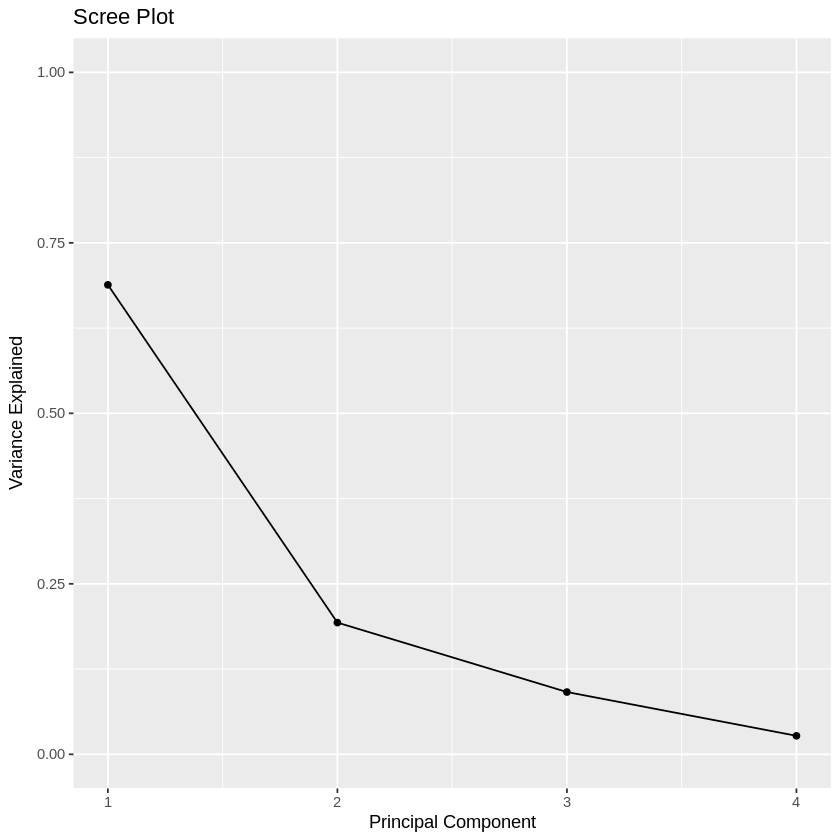

In [92]:
# 6. Scree plot

#calculate total variance explained by each principal component
pca_result_variance <- pca_result$sdev^2 / sum(pca_result$sdev^2)
cat("Total Variance of each PC:")
pca_result_variance

# We use the ggplot library to make the Scree Plot:
library(ggplot2)

qplot(c(1:4), pca_result_variance) + # Here we input the data to be plotted x = vector(1,2,3,4), y = the variance
  geom_line() + # We specify that we want a line plot
  xlab("Principal Component") + # Specify the x labels
  ylab("Variance Explained") + # Specify the y axis labels
  ggtitle("Scree Plot") + # Create a title for the plot
  ylim(0, 1) # Show everything from 0 to 1

### Examples of poor scree plots
Here are some examples of poor scree plots and that are difficult to interpret and thus without meaning. Pay attention to these things as you begin to make your own scree plots.

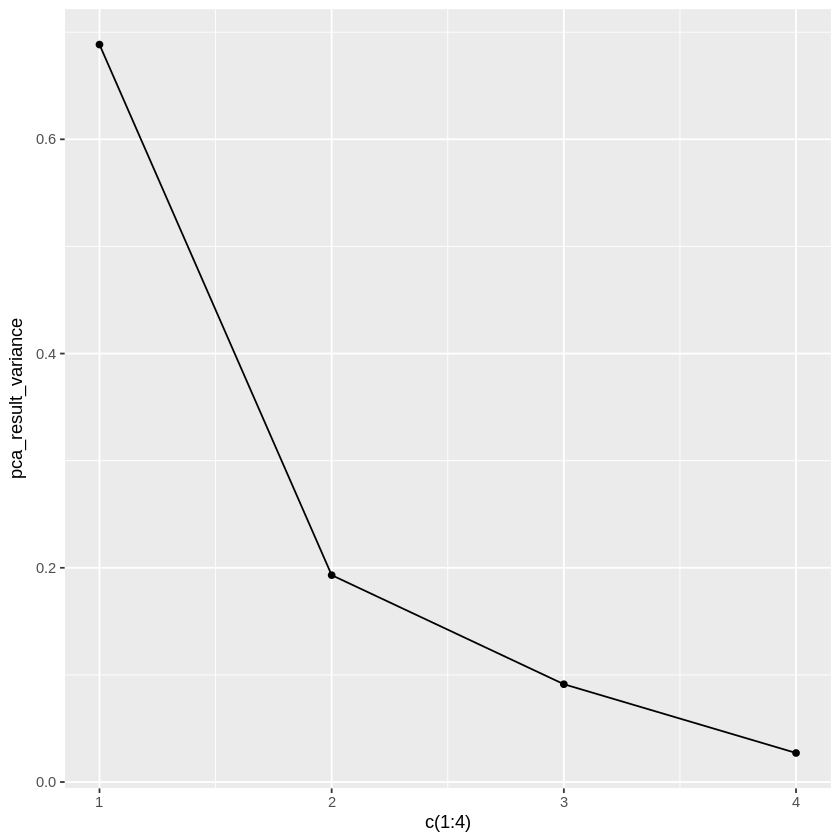

In [93]:
# Bad Scree Plot - No labels
qplot(c(1:4), pca_result_variance) +
  geom_line()

**What’s bad here:**

* No axis labels or title, we don’t know what we’re looking at
* Hard to tell how much variance is explained

In [97]:
cumsum(var_explained)

[1] 0.6884388 0.8815680 0.9728769 1.0000000

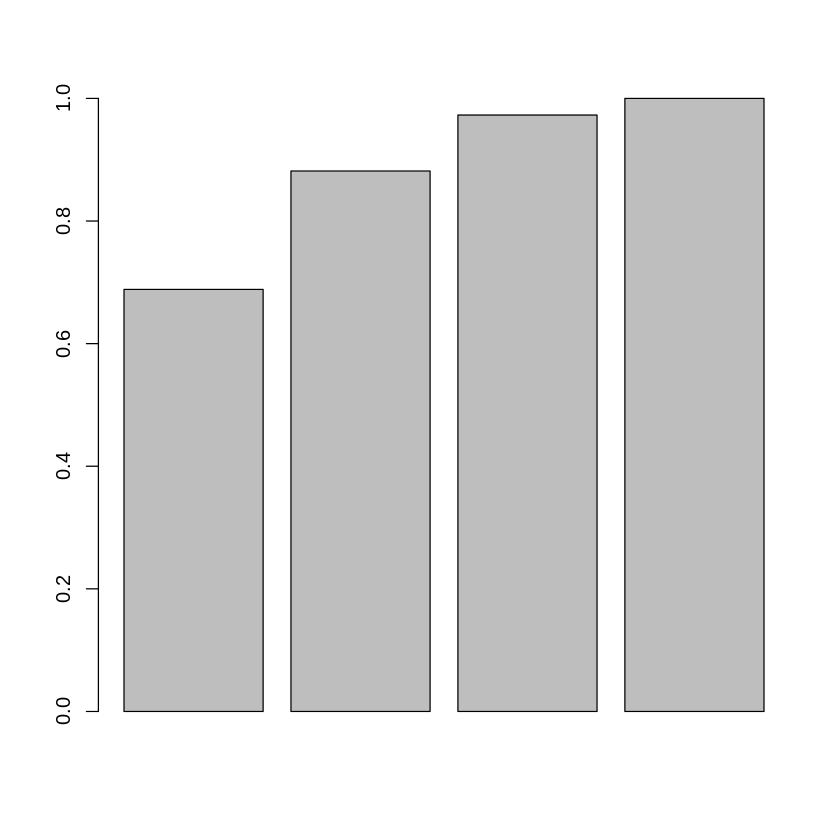

In [86]:
# Bad Scree Plot 2 - Misleading cumulative variance
cum_var <- cumsum(var_explained)
barplot(cum_var)

**What’s bad here:**

* It uses cumulative variance (looks like a curve of total variance explained) but doesn’t say so
* Bars make it look like each component explains that much individually, which is false.
* Missing labels and reference lines.

### 7. Biplot
Here we create the biplot for the PCA using `biplot` for convenience. The biplot lets you see both sides of PCA at once:

- how samples relate to each other (scores)
- how variables contribute to those relationships (loadings)

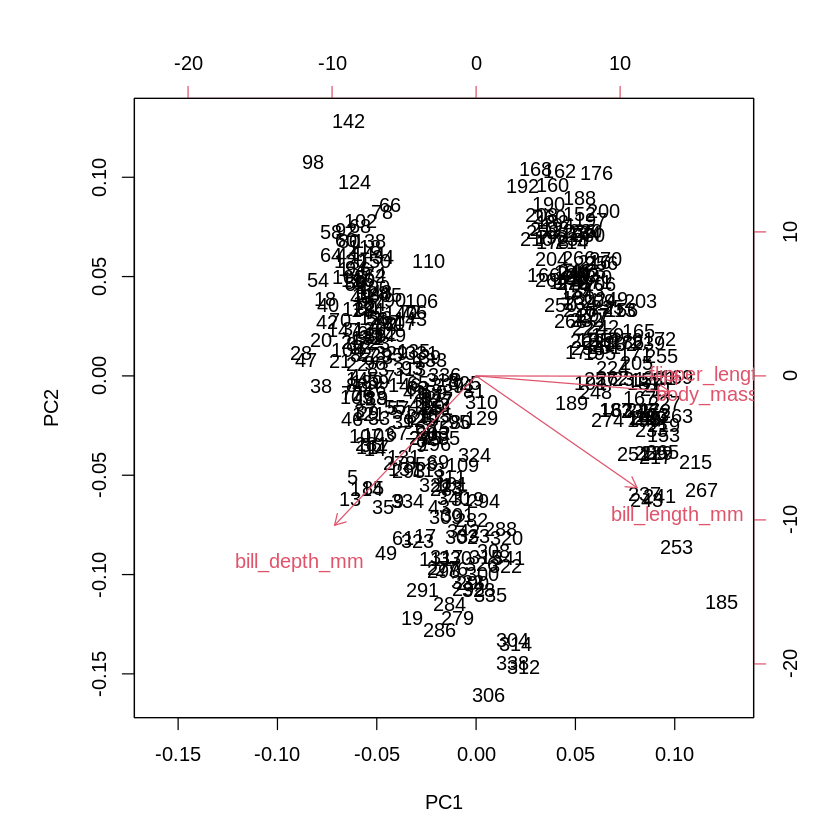

In [ ]:
# To make a basic biplot we use the `biplot` base function in R.

biplot(pca_result)

# Note that there are other parameters that we can add to this function to changes the output.

We can also use `ggplot2` to plot a biplot, and by using ggplot we can easily manipulate the look of the plot, like adding color based on species etc.

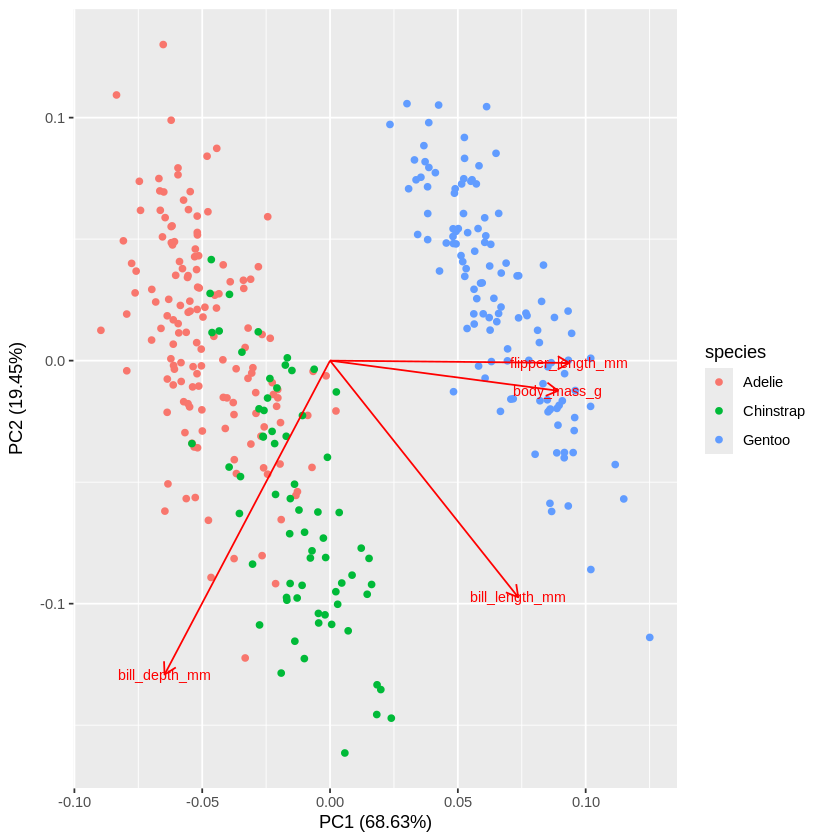

In [123]:
# Use the autoplot function ggplot
autoplot(pca_result, data = peng_na_removed, colour = 'species',
         loadings = TRUE, loadings.label = TRUE, loadings.label.size = 3)

### How to Interpret a PCA Biplot

#### 1. Look at the points

* Points represent penguins.
* Points clustered together → similar measurements
* Points from different species grouping separately → PCA is capturing species differences
* More spread-out clusters → larger variation within species

#### 2. Look at the arrows (loadings)

* Long arrows = variables that contribute strongly to PC1 or PC2
* Short arrows = weaker contribution
* The direction of the arrow shows the direction in PC space where that variable increases.

**Example:**

If flipper_length_mm arrow points mostly right → Penguins on the right side of the plot have longer flippers.

#### 3. Angle between arrows matters

* Small angle between arrows → variables are positively correlated
* Angle ~ 90° → uncorrelated
* Angle ~180° (opposite directions) → negatively correlated

#### 4. Interpretation of a penguin's position

* If a penguin lies in the same direction as an arrow,
that penguin has higher values of that variable.

**Example:**

Points in the direction of the body_mass_g arrow = heavier penguins.

### Examples of poor Biplots
Here are some examples of poor biplots and that are difficult to interpret and thus without meaning. Pay attention to these things as you begin to make your own biplots.


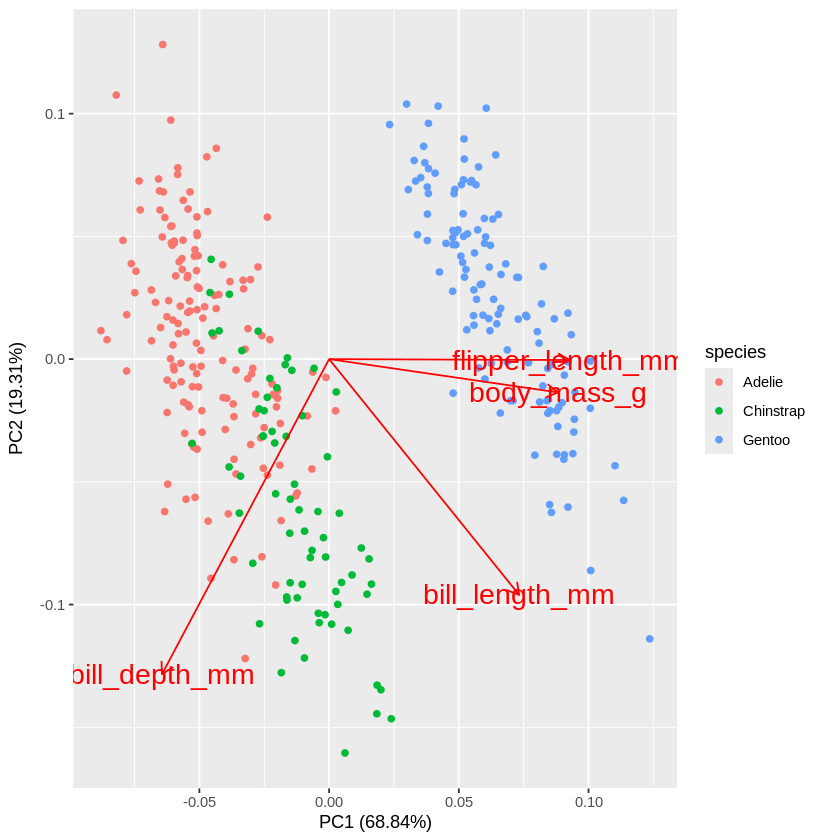

In [90]:
autoplot(pca_result, data = penguins_na, colour = 'species',
         loadings = TRUE, loadings.label = TRUE, loadings.label.size = 6)

**What’s bad here:**

* Text overlaps everywhere — labels are too large.
* Axes might not be scaled correctly (without standardization).
* It’s visually overwhelming — can’t distinguish points or interpret loadings.

---
# Task 1
## Individual exploration of the `prcomp` function

In this task you will begin by simply exploring the different parameters used in the `prcomp` function as well as alternative libraries for running a PCA in R. Most of the code is provided, but playing around with changing specific parameters and note how that might change the output.

Prior to testing the different libraries please run the following code block to create a test dataframe from the penguins library. Also feel free to adjust or change the data input itself as we've seen above.

In [139]:
#install.packages("palmerpenguins")
library(palmerpenguins)

df <- penguins %>%
  select(bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g) %>% # This line here uses `dpylr` to manipulate the dataframe and keep only numerical columns
  na.omit() # Here we omit the rows that contain NAs or missing information

#### 1. `prcomp()`

This is the most common and recommended base R function for PCA. We have thoroughly explored this in the previous sections, but feel free to try it yourself using the `df` dataframe created above.

In [70]:
prcomp_pca <- prcomp(df, center = TRUE, scale = TRUE)

summary(prcomp_pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.6594 0.8789 0.60435 0.32938
Proportion of Variance 0.6884 0.1931 0.09131 0.02712
Cumulative Proportion  0.6884 0.8816 0.97288 1.00000

Key arguments for `prcomp`:

|Parameter|Description|
|---------|-----------|
| x| Your data frame or matrix (numeric only — no factors).|
|center = TRUE|	Centers variables to mean 0. Essential if variables have different means.|
|scale = TRUE| Scales variables to unit variance (recommended if variables have different units/scales).|
|retx = TRUE| Returns the rotated data (scores for each principal component).|
|tol|Tolerance for excluding components with near-zero variance.|

#### 2. princomp()
An older base R function, its less commonly used now but still valid.

In [71]:
princomp_pca <- princomp(df, cor = TRUE)

summary(princomp_pca)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4
Standard deviation     1.6594442 0.8789293 0.60434750 0.32938157
Proportion of Variance 0.6884388 0.1931292 0.09130898 0.02712305
Cumulative Proportion  0.6884388 0.8815680 0.97287695 1.00000000

Key arguments for `princomp`:

|Parameter|Description|
|---------|-----------|
|cor = TRUE	|Equivalent to scaling.|
|scores = TRUE	|Returns principal component scores.|

#### 3. `PCA()` from FactoMineR

A popular package for PCA with many plotting and reporting options.

In [137]:
install.packages("FactoMineR")
library(FactoMineR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘doBy’, ‘pbkrtest’, ‘car’




In [141]:
PCA_pca <- PCA(df, scale.unit = TRUE, graph = FALSE)

summary(PCA_pca)


Call:
PCA(X = df, scale.unit = TRUE, graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4
Variance               2.754   0.773   0.365   0.108
% of var.             68.844  19.313   9.131   2.712
Cumulative % of var.  68.844  88.157  97.288 100.000

Individuals (the 10 first)
                      Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
1                 |  1.931 | -1.843  0.361  0.911 |  0.048  0.001  0.001 |
2                 |  1.433 | -1.307  0.181  0.831 | -0.428  0.069  0.089 |
3                 |  1.489 | -1.369  0.199  0.846 | -0.154  0.009  0.011 |
4                 |  2.035 | -1.879  0.375  0.852 | -0.002  0.000  0.000 |
5                 |  2.204 | -1.912  0.388  0.753 |  0.829  0.260  0.142 |
6                 |  1.867 | -1.763  0.330  0.891 | -0.351  0.047  0.035 |
7                 |  1.679 | -0.810  0.070  0.233 |  0.522  0.103  0.097 |
8                 |  2.149 | -1.835  0.358  0.729 | -0.770  0.224  0.128 |
9                

Key arguments for `PCA()`:

|Parameter	|Description|
|-----------|-----------|
|scale.unit = TRUE	|Standardizes variables.|
|ncp	|Number of principal components to compute.|
|graph = TRUE/FALSE	|Whether to show automatic plots.|
|quali.sup / quanti.sup	|Indicate supplementary (non-active) variables.|



---


# Task 2
## PCA Group Work

Utilizing the dataset from the paper (), you will work in small groups to run a PCA and create a scree plot and biplot to visualize the results. Use the below code as a reference if need be or work with python if you are more familiar with python libraries for this analysis. We will go over group results briefly.

### Information on the data being used for this analysis

**Understanding the data:**

* **Metadata / categorical columns:**
  * Mouse replicate
  * Mouse
  * timepoint after AB application
  * Day
  * Group

* **Quantitative measurements:**

  * Raw abundances: KB1, YL2, etc.
  * Log-transformed values: log10 KB1, log10 YL2, etc.

PCA only works on numeric data, so we’ll focus on the numeric columns (either the raw counts or the log-transformed ones — usually log-transformed is better for microbiome or abundance data to reduce skew).

### 1. Preparing Data:

In [157]:
library(dplyr)

df_mouse <- read.csv("/content/mmc2.csv", stringsAsFactors = FALSE)
head(df_mouse)

,Mouse.replicate,Mouse,timepoint.after.AB.application,Day,Group,KB1,log10.KB1,YL2,log10.YL2,KB18,⋯,I46,log10.I46,I48,log10.I48,I49,log10.I49,YL58,log10.YL58,universal,log10.universal
,<chr>,<int>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,1681,TRUE,0,water,25145275,7.400456,115496.7,5.062569,8249.76,⋯,5.92e+09,9.77,4.50e+11,11.65340,7185542948,9.85646,1.87e+10,10.3,1.51e+14,14.17842
2,B,1682,TRUE,0,water,40467836,7.607110,265611.7,5.424247,18972.26,⋯,9.21e+09,9.96,6.08e+11,11.78422,20167515328,10.30465,2.98e+10,10.5,1.21e+14,14.08417
3,C,1683,TRUE,0,water,93063435,7.968779,201342.6,5.303936,14381.62,⋯,1.59e+10,10.20,7.26e+11,11.90000,660000000000,11.81981,5.59e+10,10.7,1.69e+14,14.22895
4,D,1684,TRUE,0,water,22423763,7.350708,119275.3,5.076551,8519.67,⋯,6.09e+09,9.78,2.59e+11,11.41258,10649583333,10.02733,1.85e+10,10.3,5.89e+13,13.77034
5,A,1686,TRUE,0,Ciprofloxacin,58520384,7.767307,149150.8,5.173626,10653.63,⋯,1.26e+10,10.10,3.00e+11,11.47759,33292590726,10.52235,3.55e+10,10.6,5.79e+13,13.76302
6,B,1687,TRUE,0,Ciprofloxacin,36561379,7.563023,155864.6,5.192747,11133.18,⋯,1.22e+10,10.10,3.16e+11,11.50024,15040932739,10.17727,2.88e+10,10.5,6.47e+13,13.81117


Remove NA values and then take only the log 10 values with the mouse and day metadata. We use the log10 abundance values in this case.

In [158]:
# Remove the NA values from the dataframe:
df_na_removed <- na.omit(df_mouse)

# Keep only log columns + mouse + day
small_df <- df_na_removed %>% select(Mouse, Day, starts_with("log10"))
head(small_df)

,Mouse,Day,log10.KB1,log10.YL2,log10.KB18,log10.YL27,log10.YL31,log10.YL32,log10.YL44,log10.YL45,log10.I46,log10.I48,log10.I49,log10.YL58,log10.universal
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1681,0,7.400456,5.062569,3.916441,10.47885,10.32806,10.20,11.39313,10.040946,9.77,11.65340,9.85646,10.3,14.17842
2,1682,0,7.607110,5.424247,4.278119,10.56255,10.52781,10.50,11.42579,10.147410,9.96,11.78422,10.30465,10.5,14.08417
3,1683,0,7.968779,5.303936,4.157808,10.64875,10.50396,10.10,11.55488,10.217371,10.20,11.90000,11.81981,10.7,14.22895
4,1684,0,7.350708,5.076551,3.930423,10.17022,10.02664,9.70,11.12825,9.812321,9.78,11.41258,10.02733,10.3,13.77034
5,1686,0,7.767307,5.173626,4.027498,10.33156,10.14477,9.55,11.36014,9.883501,10.10,11.47759,10.52235,10.6,13.76302
6,1687,0,7.563023,5.192747,4.046619,10.29850,10.16023,9.64,11.26673,9.871266,10.10,11.50024,10.17727,10.5,13.81117


Now we want to make the dataset per mouse with abundance values per day. We use the tidyr package a part of `dpylr`.

In [159]:
wide <- tidyr::pivot_wider(
  small_df,
  names_from = Day,
  values_from = starts_with("log10"),
  names_glue = "{.value}_Day{Day}"
)

head(wide)

Mouse,log10.KB1_Day0,log10.KB1_Day4,log10.KB1_Day9,log10.KB1_Day14,log10.KB1_Day18,log10.KB1_Day23,log10.KB1_Day30,log10.KB1_Day37,log10.KB1_Day44,⋯,log10.universal_Day30,log10.universal_Day37,log10.universal_Day44,log10.universal_Day49,log10.universal_Day53,log10.universal_Day58,log10.universal_Day63,log10.universal_Day67,log10.universal_Day72,log10.universal_Day79
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1681,7.400456,7.737752,6.976761,8.046089,7.766844,7.001134,7.373078,8.023571,7.515060,⋯,13.65004,13.62179,13.95120,13.71750,14.09455,13.90211,14.24502,13.83850,13.63562,13.98815
1682,7.607110,7.679076,7.480347,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1683,7.968779,7.799461,7.202616,7.599573,7.723041,7.377758,7.650593,7.711853,7.403723,⋯,13.85597,13.45989,13.82472,13.87396,13.99001,13.58355,13.87643,13.95757,13.72186,13.90144
1684,7.350708,7.836255,7.494437,7.323462,7.658770,7.521129,7.437840,7.747547,7.429760,⋯,13.59079,14.05966,13.84789,13.83502,14.16118,13.88593,13.65246,14.07231,13.59579,13.87591
1686,7.767307,5.383991,7.394251,7.952250,6.703793,7.915477,7.848506,7.648762,8.243352,⋯,13.74113,13.74668,13.91908,13.56113,13.85743,13.89645,13.53353,14.04092,13.74674,13.83723
1687,7.563023,6.637206,7.484788,7.889155,7.115126,7.561124,7.850086,7.939879,7.867256,⋯,13.68999,13.93684,13.64599,13.53507,13.84403,13.87806,13.91346,14.08752,13.95124,13.67961


Note we do see some NA values here because the 1682 mouse only has values from day 0 to day 9, after that it has no measurements. Thus when we rotate the dataframe we get missing values for those reads.

In [149]:
# Check to see if there is the same number of mice once the table has been pivoted:
cat("Number of Mice pre-pivot: ")
length(unique(small_df$Mouse)) # We take the number `length` of the unique Mouse IDs in the column "Mouse"

cat("Number of mice post-pivot: ")
length(unique(wide$Mouse))

Number of Mice pre-pivot: 

[1] 16

Number of mice post-pivot: 

[1] 16

Next we want to get the day 0 to day 9 difference in abundance values. Of course you can look at other time differences as well.

Here's a breakdown of the code:

1. `mutate(across(...))`
* mutate() creates new columns.
* across() tells mutate: apply the same operation to multiple columns.

2. `contains("Day9")`
* This selects every column whose name contains "Day9".

3. The function: `~ . - get(sub("_Day9","_Day0", cur_column()))`

* cur_column() - Returns the current column name, e.g. "KB1_Day9".
* sub("_Day9","_Day0", cur_column()) - Replaces "Day9" with "Day0".
  * "KB1_Day9" → "KB1_Day0"
  * "YL2_Day9" → "YL2_Day0"

* get(...) - Retrieves that column from the dataframe.
* The .~ means:
  * . = the value of the current Day9 column
  * get(...) = the matching Day0 column

**So the expression does: Day9_value - Day0_value**

4. `.names = "{.col}_delta9"`
* This tells mutate() how to name the new column.

In [153]:
delta_df <- wide %>%
  mutate(across(contains("Day9"),
                ~ . - get(sub("_Day9","_Day0", cur_column())),
                .names = "{.col}_delta9"))

head(delta_df)

Mouse,log10.KB1_Day0,log10.KB1_Day4,log10.KB1_Day9,log10.KB1_Day14,log10.KB1_Day18,log10.KB1_Day23,log10.KB1_Day30,log10.KB1_Day37,log10.KB1_Day44,⋯,log10.YL27_Day9_delta9,log10.YL31_Day9_delta9,log10.YL32_Day9_delta9,log10.YL44_Day9_delta9,log10.YL45_Day9_delta9,log10.I46_Day9_delta9,log10.I48_Day9_delta9,log10.I49_Day9_delta9,log10.YL58_Day9_delta9,log10.universal_Day9_delta9
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1681,7.400456,7.737752,6.976761,8.046089,7.766844,7.001134,7.373078,8.023571,7.515060,⋯,0.1092704,-0.24862749,-0.49,-0.01973732,-0.11326004,-0.78,-0.05845773,-0.6061857,-0.58,-0.39414590
1682,7.607110,7.679076,7.480347,NA,NA,NA,NA,NA,NA,⋯,0.3583359,0.18188602,0.00,0.15316153,0.19403834,-0.07,0.22700579,-0.3267795,-0.10,0.09678334
1683,7.968779,7.799461,7.202616,7.599573,7.723041,7.377758,7.650593,7.711853,7.403723,⋯,-0.1774320,-0.47125354,-0.53,-0.29568070,-0.24602687,-0.81,-0.39635365,-2.0495910,-0.76,-0.64546856
1684,7.350708,7.836255,7.494437,7.323462,7.658770,7.521129,7.437840,7.747547,7.429760,⋯,0.6598156,0.43698279,0.05,0.52177184,0.34283169,-0.19,0.41525543,-0.4159023,-0.20,0.20791208
1686,7.767307,5.383991,7.394251,7.952250,6.703793,7.915477,7.848506,7.648762,8.243352,⋯,0.2377360,-0.05351732,0.09,-0.08445438,0.20258739,-0.45,0.00234067,-0.6882281,-0.50,0.14369157
1687,7.563023,6.637206,7.484788,7.889155,7.115126,7.561124,7.850086,7.939879,7.867256,⋯,0.2350523,-0.23429321,-0.06,-0.10382006,0.04167319,-0.74,-0.14373945,-0.2622751,-0.52,-0.07665994


In [163]:
# Keeping mouse column for metadata but selecting the columns containing the difference in abundances
day9_delta <- delta_df %>% select(Mouse, contains("delta"))
day9_delta <- na.omit(day9_delta)

# Now creating a separate dataframe for the numerical only values to be used in the PCA
day9_delta_only <- day9_delta %>% select(contains("delta"))

head(day9_delta_only)

log10.KB1_Day9_delta9,log10.YL2_Day9_delta9,log10.KB18_Day9_delta9,log10.YL27_Day9_delta9,log10.YL31_Day9_delta9,log10.YL32_Day9_delta9,log10.YL44_Day9_delta9,log10.YL45_Day9_delta9,log10.I46_Day9_delta9,log10.I48_Day9_delta9,log10.I49_Day9_delta9,log10.YL58_Day9_delta9,log10.universal_Day9_delta9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.42369494,0.39361489,0.39361506,0.1092704,-0.24862749,-0.49,-0.01973732,-0.11326004,-0.78,-0.05845773,-0.6061857,-0.58,-0.39414590
-0.12676291,0.09671775,0.09671778,0.3583359,0.18188602,0.00,0.15316153,0.19403834,-0.07,0.22700579,-0.3267795,-0.10,0.09678334
-0.76616311,-0.01852508,-0.01852519,-0.1774320,-0.47125354,-0.53,-0.29568070,-0.24602687,-0.81,-0.39635365,-2.0495910,-0.76,-0.64546856
0.14372855,0.64919547,0.64919530,0.6598156,0.43698279,0.05,0.52177184,0.34283169,-0.19,0.41525543,-0.4159023,-0.20,0.20791208
-0.37305603,0.02236127,0.02236130,0.2377360,-0.05351732,0.09,-0.08445438,0.20258739,-0.45,0.00234067,-0.6882281,-0.50,0.14369157
-0.07823433,0.05220525,0.05220544,0.2350523,-0.23429321,-0.06,-0.10382006,0.04167319,-0.74,-0.14373945,-0.2622751,-0.52,-0.07665994


### Running the PCA:

Here we use the `prcomp` function to run a PCA:

In [164]:
pca_result_delta <- prcomp(day9_delta_only, center = TRUE, scale = TRUE)
summary(pca_result_delta)

Importance of components:
                         PC1    PC2   PC3     PC4    PC5     PC6     PC7
Standard deviation     2.640 1.6799 1.269 0.96928 0.6162 0.35262 0.25436
Proportion of Variance 0.536 0.2171 0.124 0.07227 0.0292 0.00956 0.00498
Cumulative Proportion  0.536 0.7531 0.877 0.94930 0.9785 0.98807 0.99305
                           PC8     PC9    PC10    PC11    PC12      PC13
Standard deviation     0.21204 0.15607 0.10269 0.09926 0.02501 1.232e-07
Proportion of Variance 0.00346 0.00187 0.00081 0.00076 0.00005 0.000e+00
Cumulative Proportion  0.99651 0.99838 0.99919 0.99995 1.00000 1.000e+00

### Visualizations:
#### Scree Plot
Use ggplot to create a scree plot of the variance for each principal component.

Variance explained: 

[1] 5.360051e-01 2.170785e-01 1.239520e-01 7.226938e-02 2.920447e-02
 [6] 9.564569e-03 4.976829e-03 3.458453e-03 1.873598e-03 8.111772e-04
[11] 7.578238e-04 4.810177e-05 1.167086e-15

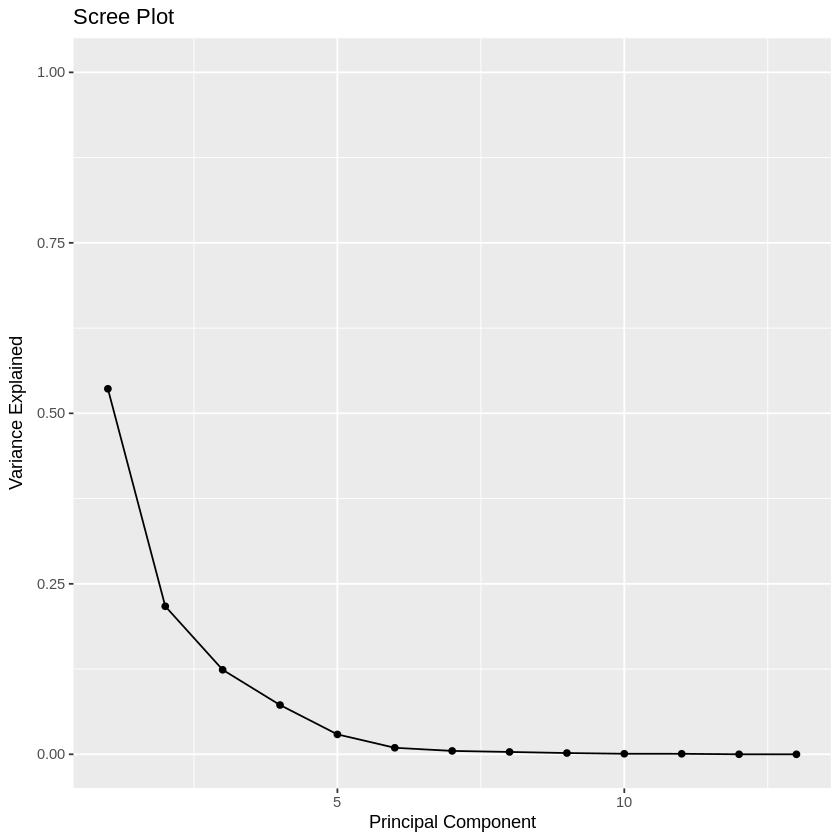

In [165]:
library(ggplot2)

# Getting the variance explained by each PC
eig_vals_pulse <- pca_result_delta$sdev^2
var_explained_pulse <- eig_vals_pulse / sum(eig_vals_pulse)
cat("Variance explained: ")
var_explained_pulse

qplot(c(1:13), var_explained_pulse) + # Here we input the data to be plotted x = vector(1,2,3,4), y = the variance
  geom_line() + # We specify that we want a line plot
  xlab("Principal Component") + # Specify the x labels
  ylab("Variance Explained") + # Specify the y axis labels
  ggtitle("Scree Plot") + # Create a title for the plot
  ylim(0, 1) # Show everything from 0 to 1

#### Biplot
Use ggplot to create a biplot of the first PC. Same as what we saw in the examples that we did above. The plot below is sufficient, though please play around with some of the features in ggplot to make it more readable all in all (as is seen with the second biplot).

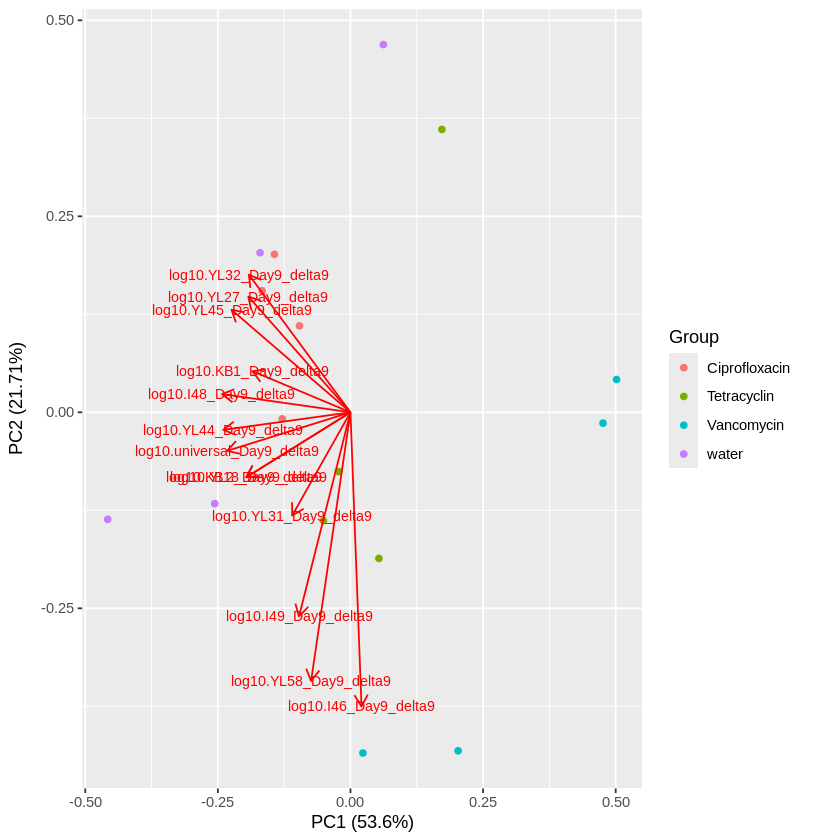

In [172]:
# Getting the metadata for coloring in the plot
metadata <- df_na_removed %>% select(Mouse, Group)
metadata_mice <- unique.data.frame(metadata)

# Creating the biplot
autoplot(pca_result_delta,
         data = metadata_mice,
         colour = 'Group',
         loadings = TRUE,
         loadings.label = TRUE,
         loadings.label.size = 3)

Here is an example of a more complex biplot, colored by treatment and the mouse point are increased in size as well as arrows changed to black with improved labeling to reduce overlapping. Feel free to change and play around with the settings here to see what best represents the data in the way you want.

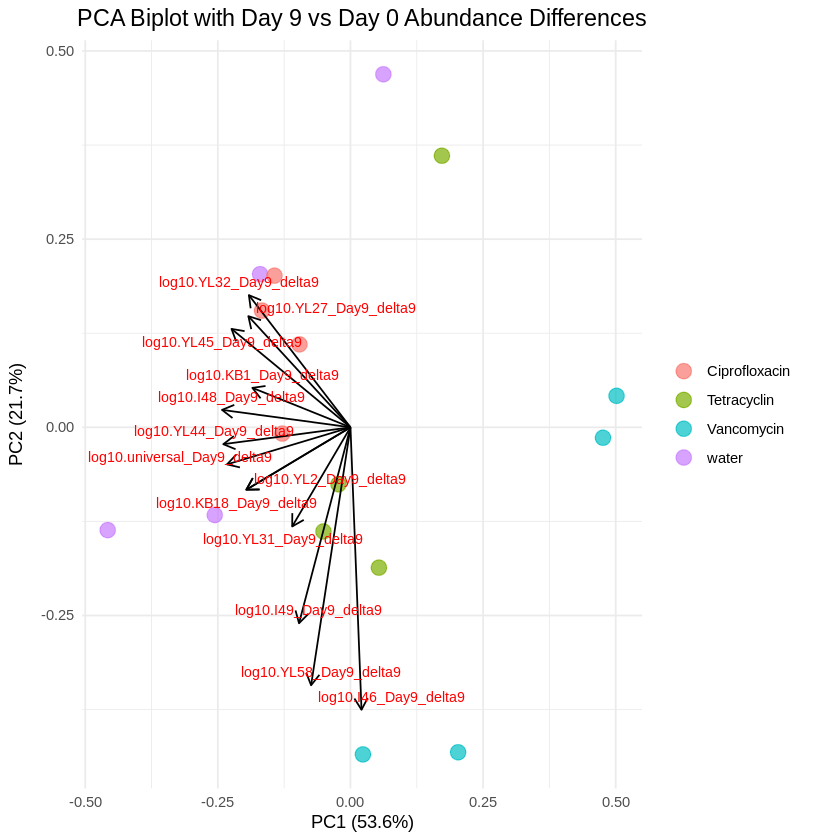

In [173]:
autoplot(pca_result_delta,
         data = metadata_mice,
         colour = 'Group',
         loadings = TRUE,
         loadings.label = TRUE,   # Add loadings labels
         loadings.label.size = 3, # Adjust label size for readability
         loadings.colour = "black", # Make the loadings labels black for better contrast
         loadings.label.repel = TRUE, # Use repelling labels to avoid overlaps
         size = 4,                # Adjust the size of the points
         alpha = 0.7) +           # Adjust transparency to make points more distinguishable
  labs(title = "PCA Biplot with Day 9 vs Day 0 Abundance Differences",
       x = paste("PC1 (", round(53.6, 1), "%)", sep = ""),
       y = paste("PC2 (", round(21.7, 1), "%)", sep = "")) +
  theme_minimal() +
  theme(legend.position = "right",  # Move the legend to the right
        legend.title = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 14)) # Center title

Big picture of this biplot:

* Points = samples (each mouse)
* Colors = antibiotic treatment group
* Arrows = bacterial taxa (log10 abundances)
* PC1 & PC2 axes = the two strongest patterns of variation

###Interpretation:

1. PCA Axes:

* The PC1 axis (horizontal) explains 53.6% of the variation in your data. It seems to separate most of the data into distinct groups.

* The PC2 axis (vertical) explains 21.7% of the variation, and it likely helps to distinguish some additional patterns that were not captured by PC1.

2. Points (Samples):

* Each colored point represents a sample from a group (Ciprofloxacin, Tetracyclin, Vancomycin, or water).

* The points seem to be clustered based on the treatment group. This suggests that the treatment (antibiotic) strongly influences the composition of the microbial community as measured by the taxa.

3. Arrows (Biplot Vectors):

* The arrows represent individual taxa and their log abundance at day 9 compared to day 0. The direction of the arrow shows the taxon’s association with the principal components (PC1 and PC2).

* A longer arrow suggests a stronger contribution of that taxa to the variation in the dataset. For example, taxa with longer arrows are more influential in explaining the spread of samples along the principal components.

4. Interpretation of Axis Separation:

* The group with the most separation along PC1 is likely the water samples (purple), which are distant from the other groups, suggesting they are the most different.

* Ciprofloxacin, Tetracyclin, and Vancomycin show less variation between them in this PCA space, but they still exhibit some clustering, which indicates they might share similar microbial community changes.

5. Goodness of Plot:

* The percentages (PC1: 53.6%, PC2: 21.7%) indicate that the plot captures a good amount of the variance (approximately 75.3%), which is good for a PCA.

* The plot clearly shows clustering by group, which is a positive outcome, indicating that the treatments (antibiotics) likely have distinct effects on the microbial composition.